### What is our goal: diagonalizing the Hamiltonian

The Schrödinger equation is essentially an eigenvalue problem. This is true, whether or not the system consists of a single particle or multiple particles interacting with one another. Once we write down the Hamiltonian as a matrix (in a finite-dimensional case, obviously), we can solve all the quantum states by diagonalizing the Hamiltonian, i.e. solving the eigenvalues and -vectors of the Hamiltonian matrix. The ground state is the state with the lowest eigenvalue, with all the other states being excited states.

Let's consider a numerical solution to a simple one-particle system: the quantum mechanical harmonic oscillator. We will be using the dimensionless form of the equation, i.e. with energy will be given in units of $\hbar\omega$ and distance in units of $\sqrt{\hbar/(m\omega)}$. The Schrödinger equation for the one-dimensional harmonic oscillator will then be
$$
    \left(-\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2}x^2 \right)\Psi_n(x) = E_n\Psi_n(x),
$$
where the $\Psi_n$ is the wave function of the *n*th state and $E_n$ the corresponding energy. The Hamiltonian operator $\hat{H}$ consists of two terms: the kinetic energy $-\frac{1}{2} \frac{d^2}{dx^2}$ and the potential energy $\frac{1}{2}x^2$,
$$
    \hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2}x^2.
$$
We'll now discretize both of these operators on a real-space grind and solve the harmonic oscillator numerically. We'll then compare our results with the well known analytical solutions.

### How to discretize the Hamiltonian

To discretize the Hamiltonian, let's first span our one-dimensional space on a grid $\mathbf{x} = [x_0, x_1, \ldots x_N]$ where $\{x_i\}$ is the $i$th grid point on an interval $[-4,4]$, with each grid point equally spaced. The kinetic energy part of the Hamiltonian can then be expressed as a finite difference matrix,
$$
    \frac{d^2 f}{dx^2} \approx \frac{f(x_{n+1}) - 2f(x_n) - f(x_{n-1})}{h^2}
$$
where $h$ is the spacing between the grid points. 
This type of matrix looks like
$$
D_{xx} = \frac{1}{h^2}\left[
    \begin{array}{cccccc}
    -2 & 1 & 0 & \ldots & 0 & 0 \\
    1 & -2 & 1 & \ldots & 0 & 0 \\
    0 & 1 & -2 & \ldots & 0 & 0 \\
    \vdots & & &\ddots & & \vdots \\
    0& 0& 0 & \ldots & -2 & 1 \\
    0 & 0 & 0 & \ldots &1 & -2
    \end{array}
\right]
$$
We'll construct a matrix of this type using NumPy:

In [51]:
import numpy as np

h = 0.1
x = np.arange(-4, 4, h)
n = len(x)

# Discretized Laplacian
Dxx = -2 * np.eye(n,)
b = np.ones(n)
Dxx += np.diag(b[:-1], k=1) + np.diag(b[:-1], k=-1)
Dxx /= h**2

To construct the full Hamiltonian, we also need to discretize the the harmonic potential. We write the potential as a diagonal matrix, with the potential evaluated on each grid point on the diagonal.

In [52]:
# Harmonic potential
V = np.zeros((n,n))
for i in range(n):
    V[i,i] = 0.5 * x[i]**2

### Solving the Schrödinger equation

Combining the kinetic and potential energy matrices results in the full Hamiltonian for the 1-dimensional harmonic oscillator. Solving the Schrödinger equation now simply means diagonalizating the Hamiltonian matrix. This gives us the eigenvalues and -vectors of the system.

In [53]:
H = -0.5 * Dxx + V
e, wf = np.linalg.eigh(H)

The ground state is the eigenstate corresponding to the lowest eigenvalue. The Numpy *eigh*-function already sorts the eigenstate in an ascending order of the eigenvalues, so the ground state corresponds to the first entry on the list. The eigenvectors are spanned on the real space grid and so we can plot it on the grid. However, the wavefunction needs to be correctly normalized. The norm of the wavefunction can be computed on the grid as
$$
    \int_{-\infty}^\infty \psi(x)^2 dx \approx \sum_i \left|\psi(x_i)\right|^2 h = 1,
$$
and so we need to account for the grid spacing in our eigenvectors by dividing them with the square root of the grid spacing. Let's compare our numerical solution with the exact analytical solution on the same grid.

Let's see how well the ground state and the first two excited states measure against the analytical solutions.

Numerical ground state energy 0.4997
Exact ground state energy 0.5000


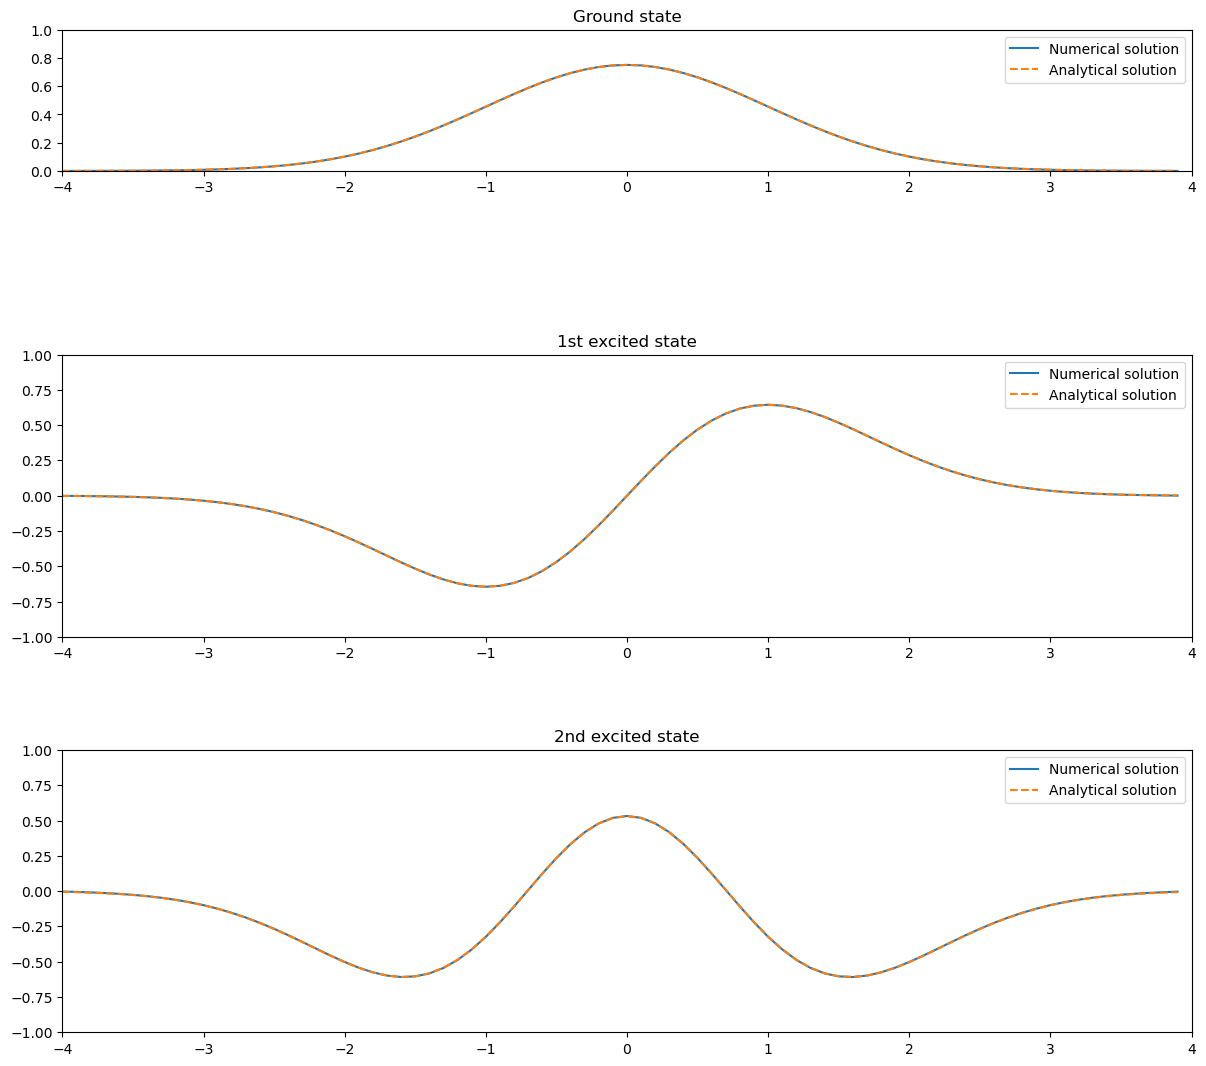

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
fig.tight_layout(pad=1.0)

e0 = e[0]
wf0 = wf[:,0] / h**0.5
wf0_analytical = np.pi**-0.25 * np.exp(-0.5*x**2)
print(f'Numerical ground state energy {e0:.4f}')
print(f'Exact ground state energy 0.5000')
axs[0].plot(x, wf0, label='Numerical solution')
axs[0].plot(x, wf0_analytical, linestyle='dashed', label='Analytical solution')
axs[0].set_title('Ground state')
axs[0].set_aspect('equal')
axs[0].set_xlim(-4,4)
axs[0].set_ylim(0, 1.)
axs[0].legend(loc="upper right")

wf1 = wf[:,1] / h**0.5
wf1_analytical = np.pi**-0.25 * np.exp(-0.5*x**2) * (2**0.5 * x)
axs[1].plot(x, wf1, label='Numerical solution')
axs[1].plot(x, wf1_analytical, linestyle='dashed', label='Analytical solution')
axs[1].set_title('1st excited state')
axs[1].set_aspect('equal')
axs[1].set_xlim(-4,4)
axs[1].set_ylim(-1, 1.)
axs[1].legend(loc="upper right")

wf2 = wf[:,2] / h**0.5
wf2_analytical = -np.pi**-0.25 * np.exp(-0.5*x**2) * (1 / (2**1.5)) * (4*x**2 - 2)
axs[2].plot(x, wf2, label='Numerical solution')
axs[2].plot(x, wf2_analytical, linestyle='dashed', label='Analytical solution')
axs[2].set_title('2nd excited state')
axs[2].set_aspect('equal')
axs[2].set_xlim(-4,4)
axs[2].set_ylim(-1, 1.)
axs[2].legend(loc="upper right")
plt.show()

Our results on the numerical grind nicely match with the analytical solutions. For the second excited state, our numerical result is identical up to a phase-factor, which we can fix by multiplying the analytical solution by -1. This will not affect any observable results, since the phase-factor will alway cancel out when we are computing observables.

### Conclusion

Regardless whether the quantum system consists of a single particle or many particles, the system is solved by constructing the Hamiltonian and then diagonalizing it. This is essentially the goal in the Hartree--Fock approach as well. However, with many particle systems we face the issue of electron--electron interaction. We will therefore first construct a sort of approximate Hamiltonian that we will solve iteratively (using the self-consistent field). We will then use the eigenstates of the Hartee--Fock solution to build the exact Hamiltonian (configuration interaction). It must be emphasized that in the Hartree--Fock method, we make no approximations to the Hamiltonian per se. The Hartree--Fock approximation is to write the antisymmetric wavefunction in terms of only a single Slater determinant. This results in some of the electron--electron integrals to become zero, effectively resulting in an "incomplete" Hamiltonian, called the Fockian matrix.